In this Jupyter Notebook, I am showing the results of fitting models **directly** to the raw data, without any preprocessing. This will give us some baseline performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../../data/music.csv')
data.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,...,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,...,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,...,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,...,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,...,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [3]:
million_song = pd.read_csv('../../data/million_song.csv')

In [4]:
data.join(pd.get_dummies(million_song['country']))

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,...,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year,foreign,unknown,us
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,...,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0,0,0,1
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,...,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969,0,0,1
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,...,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0,0,1,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,...,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982,1,0,0
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,...,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007,0,1,0
5,0.385471,ARKFYS91187B98E58F,Jeff And Sheri Easter,NaN,0.0,0.121,1.17118,0.438,0.74856,267.70240,...,147.782,southern gospel,1.000000,3.0,0.454,The Moon And I (Ordinary Day Album Version),0,0,1,0
6,0.261941,ARD0S291187B9B7BF5,Rated R,NaN,0.0,0.709,0.27253,0.709,0.27253,114.78159,...,111.787,breakbeat,1.000000,1.0,0.000,Keepin It Real (Skit),0,0,0,1
7,0.605507,AR10USD1187B99F3F1,Tweeterfriendly Music,NaN,0.0,0.142,0.65428,0.234,0.65428,189.57016,...,101.430,post-hardcore,0.999818,3.0,0.408,Drop of Rain,0,1,0,0
8,0.332276,AR8ZCNI1187B9A069B,Planet P Project,NaN,0.0,0.806,1.91886,0.440,1.22595,269.81832,...,86.643,new wave,0.959766,4.0,0.487,Pink World,1984,0,1,0
9,0.422706,ARNTLGG11E2835DDB9,Clp,NaN,0.0,0.047,0.62445,1.000,0.09933,266.39628,...,114.041,breakcore,0.915602,4.0,0.878,Insatiable (Instrumental Version),0,0,1,0


In [5]:
hotness1_df = pd.read_csv('../../data/hotness1.csv', header = None)
hotness1_df.columns = ['Youtube Hotness']
data['Youtube Hotness'] = np.log(1e-6 + hotness1_df['Youtube Hotness'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
artist.hotttnesss            10000 non-null float64
artist.id                    10000 non-null object
artist.name                  10000 non-null object
artist_mbtags                3711 non-null object
artist_mbtags_count          10000 non-null float64
bars_confidence              10000 non-null float64
bars_start                   10000 non-null float64
beats_confidence             10000 non-null float64
beats_start                  10000 non-null float64
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
familiarity                  9996 non-null float64
key                          10000 non-null float64
key_confidence               10000 non-null float64
latitude                     10000 non-null float64
location                     10000 non-null object
longitude                    10000 non-null float64
loudness      

In [7]:
numeric_data = data.select_dtypes(include=[np.number]) 

Remove all NAs and standarize

In [8]:
numeric_data = numeric_data.dropna(axis = 0)

In [9]:
numeric_data = numeric_data.drop(['song.hotttnesss', 'bars_confidence', 'beats_confidence', 'key_confidence', 'mode_confidence', 'tatums_confidence', 'time_signature_confidence'], axis = 1)


In [10]:
numeric_data.to_csv('../../data/raw_data_location_one_hot')

In [8]:
X = numeric_data.drop(['song.hotttnesss', 'Youtube Hotness'], axis = 1)
Y = numeric_data['Youtube Hotness']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2019)

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/zheyuwu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Linear Regression

In [11]:
linearModel = LinearRegression()

In [12]:
linearModel.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y_predict = linearModel.predict(X_test_scaled)

**Training Set Performance**

In [14]:
print ('R-square score of Linear Regression Model is {}'.format(r2_score(y_train, linearModel.predict(X_train_scaled))))

R-square score of Linear Regression Model is 0.13095503164068856


In [15]:
print ('MSE of Linear Regression Model is {}'.format(mean_squared_error(y_train, linearModel.predict(X_train_scaled))))

MSE of Linear Regression Model is 67.94346066247424


**Test Set Performance**

In [16]:
print ('R-square score of Linear Regression Model is {}'.format(r2_score(y_test, y_predict)))

R-square score of Linear Regression Model is 0.11196968436337151


In [17]:
print ('MSE of Linear Regression Model is {}'.format(mean_squared_error(y_test, y_predict)))

MSE of Linear Regression Model is 68.3332235149738


## kNN

In [18]:
KNNmodels = {}
k_set = [1,10,75,250,500,750,1000]

In [19]:
r2_test = []
r2_train = []
mse_test = []
mse_train = []

In [20]:
for k in k_set:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train_scaled, y_train)
    KNNmodels[k] = knnreg

In [21]:
for k, model in KNNmodels.items():
    y_predict = model.predict(X_test_scaled)
    
    r2_test.append(r2_score(y_test, y_predict))
    r2_train.append(r2_score(y_train, model.predict(X_train_scaled)))
    mse_test.append(mean_squared_error(y_test, y_predict))
    mse_train.append(mean_squared_error(y_train, model.predict(X_train_scaled)))

**Performance**

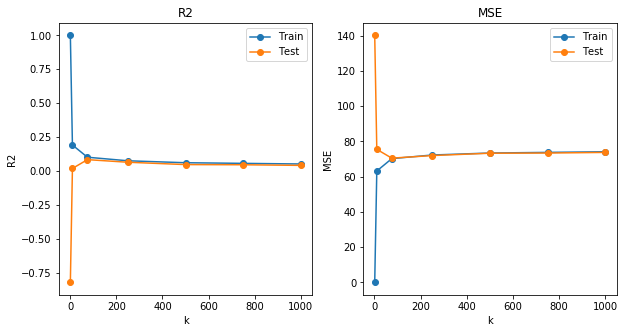

In [22]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].plot(k_set, r2_train, marker = 'o', label = 'Train')
axes[0].plot(k_set, r2_test, marker = 'o', label = 'Test')
axes[0].set_title('R2')
axes[0].set_xlabel('k')
axes[0].set_ylabel('R2')
axes[0].legend()
axes[1].plot(k_set, mse_train, marker = 'o', label = 'Train')
axes[1].plot(k_set, mse_test, marker = 'o', label = 'Test')
axes[1].set_title('MSE')
axes[1].set_xlabel('k')
axes[1].set_ylabel('MSE')
axes[1].legend();

## Regression Tree

In [23]:
tree_list = []
tree_depth = [1,2,5,8,10,15,20]
for i in tree_depth:
    tree = DecisionTreeRegressor(max_depth = i)
    tree.fit(X_train_scaled, y_train)
    tree_list.append(tree)

In [24]:
r2_test = []
r2_train = []
mse_test = []
mse_train = []

In [25]:
for tree in tree_list:
    y_predict = tree.predict(X_test_scaled)
    
    r2_test.append(r2_score(y_test, y_predict))
    r2_train.append(r2_score(y_train, tree.predict(X_train_scaled)))
    mse_test.append(mean_squared_error(y_test, y_predict))
    mse_train.append(mean_squared_error(y_train, tree.predict(X_train_scaled)))

**Performance**

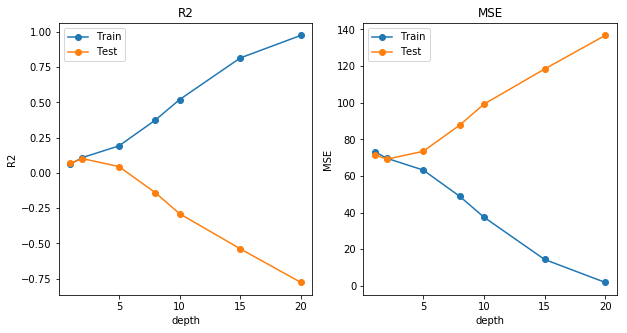

In [26]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].plot(tree_depth, r2_train, marker = 'o', label = 'Train')
axes[0].plot(tree_depth, r2_test, marker = 'o', label = 'Test')
axes[0].set_title('R2')
axes[0].set_xlabel('depth')
axes[0].set_ylabel('R2')
axes[0].legend()
axes[1].plot(tree_depth, mse_train, marker = 'o', label = 'Train')
axes[1].plot(tree_depth, mse_test, marker = 'o', label = 'Test')
axes[1].set_title('MSE')
axes[1].set_xlabel('depth')
axes[1].set_ylabel('MSE')
axes[1].legend();

## Random Forest for Regression

In [27]:
forest_list = []
forest_depth = [1,2,5,8,10,15,20]
for i in tree_depth:
    forest = RandomForestRegressor(max_depth = i, n_estimators=10)
    forest.fit(X_train_scaled, y_train)
    forest_list.append(forest)

In [28]:
r2_test = []
r2_train = []
mse_test = []
mse_train = []

In [29]:
for forest in forest_list:
    y_predict = forest.predict(X_test_scaled)
    
    r2_test.append(r2_score(y_test, y_predict))
    r2_train.append(r2_score(y_train, forest.predict(X_train_scaled)))
    mse_test.append(mean_squared_error(y_test, y_predict))
    mse_train.append(mean_squared_error(y_train, forest.predict(X_train_scaled)))

**Performance**

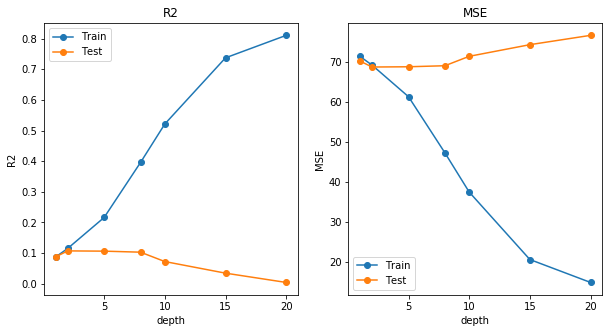

In [30]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].plot(forest_depth, r2_train, marker = 'o', label = 'Train')
axes[0].plot(forest_depth, r2_test, marker = 'o', label = 'Test')
axes[0].set_title('R2')
axes[0].set_xlabel('depth')
axes[0].set_ylabel('R2')
axes[0].legend()
axes[1].plot(forest_depth, mse_train, marker = 'o', label = 'Train')
axes[1].plot(forest_depth, mse_test, marker = 'o', label = 'Test')
axes[1].set_title('MSE')
axes[1].set_xlabel('depth')
axes[1].set_ylabel('MSE')
axes[1].legend();

## Neural Network

In [31]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [32]:
H = 100
input_dim = 25
drop_out_rate = 0.2
batch_size = 128

In [33]:
multi_layer_model = Sequential()

multi_layer_model.add(Dense(H, input_dim=input_dim,  activation='relu'))
multi_layer_model.add(Dropout(drop_out_rate))
multi_layer_model.add(Dense(H, activation='relu'))
multi_layer_model.add(Dropout(drop_out_rate))
multi_layer_model.add(Dense(H, activation='relu'))
multi_layer_model.add(Dropout(drop_out_rate))
multi_layer_model.add(Dense(1, activation='linear'))  

multi_layer_model.compile(loss='mean_squared_error', optimizer='sgd')

In [34]:
multi_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total para

In [35]:
multi_layer_model.fit(X_train_scaled, y_train, batch_size=batch_size, verbose = 1)

Epoch 1/1
3953/3953 [==============================] - 0s 61us/step - loss: 81.2236


**Training Set Performance**

In [36]:
print ('R-square score of MLP Model is {}'.format(r2_score(y_train, multi_layer_model.predict(X_train_scaled))))
print ('MSE of MLP is {}'.format(mean_squared_error(y_train, multi_layer_model.predict(X_train_scaled))))

R-square score of MLP Model is -0.016418549785838676
MSE of MLP is 79.4653858756713


**Test Set Performance**

In [37]:
y_predict = multi_layer_model.predict(X_test_scaled)

In [38]:
print ('R-square score of Linear Regression Model is {}'.format(r2_score(y_test, y_predict)))
print ('MSE of Linear Regression Model is {}'.format(mean_squared_error(y_test, y_predict)))

R-square score of Linear Regression Model is -0.02686980220488633
MSE of Linear Regression Model is 79.01681111476367
